###Importing Requisite Libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
!nvidia-smi

Mon Apr 12 16:19:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


###Creating a dataset

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
# Creating training data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='training',
    interpolation='bilinear', follow_links=False
)

Found 2319 files belonging to 9 classes.
Using 1856 files for training.


In [8]:
# Creating validation data
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='int',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(180,
    180), shuffle=True, seed=123, validation_split=0.2, subset='validation',
    interpolation='bilinear', follow_links=False
)

Found 2319 files belonging to 9 classes.
Using 463 files for validation.


In [9]:
# Printing the class names
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


###Visualizing the Data

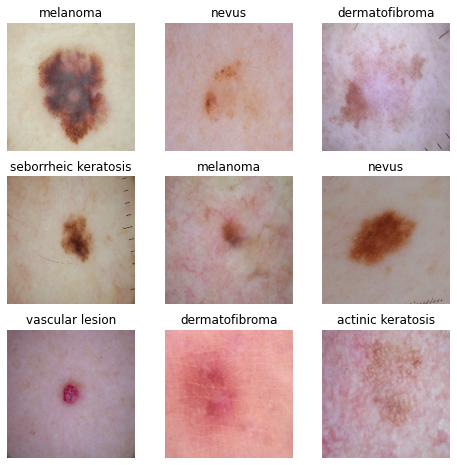

In [11]:
# plotting some random 9 images
num_classes = 9
plt.figure(figsize=(8, 8))
for img, lbls in val_ds.take(1):
  for i in range(num_classes):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i].numpy().astype("uint8"))
    plt.title(class_names[lbls[i]])
    plt.axis("off")

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

###Creating the initial model

In [13]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

###Compiling the model

In [14]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 90, 90, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0

###Training the initial model

In [16]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
58/58 [==============================] - 269s 819ms/step - loss: 2.0931 - accuracy: 0.2496 - val_loss: 1.6653 - val_accuracy: 0.4017
Epoch 2/20
58/58 [==============================] - 1s 20ms/step - loss: 1.5894 - accuracy: 0.4593 - val_loss: 1.5128 - val_accuracy: 0.4924
Epoch 3/20
58/58 [==============================] - 1s 20ms/step - loss: 1.4679 - accuracy: 0.4883 - val_loss: 1.4403 - val_accuracy: 0.5227
Epoch 4/20
58/58 [==============================] - 1s 20ms/step - loss: 1.3053 - accuracy: 0.5407 - val_loss: 1.4114 - val_accuracy: 0.5292
Epoch 5/20
58/58 [==============================] - 1s 20ms/step - loss: 1.2154 - accuracy: 0.5756 - val_loss: 1.4080 - val_accuracy: 0.5313
Epoch 6/20
58/58 [==============================] - 1s 20ms/step - loss: 1.1285 - accuracy: 0.6214 - val_loss: 1.3005 - val_accuracy: 0.5572
Epoch 7/20
58/58 [==============================] - 1s 20ms/step - loss: 1.0674 - accuracy: 0.6204 - val_loss: 1.3478 - val_accuracy: 0.5248
Epoch 8/20

###Visualizing training data

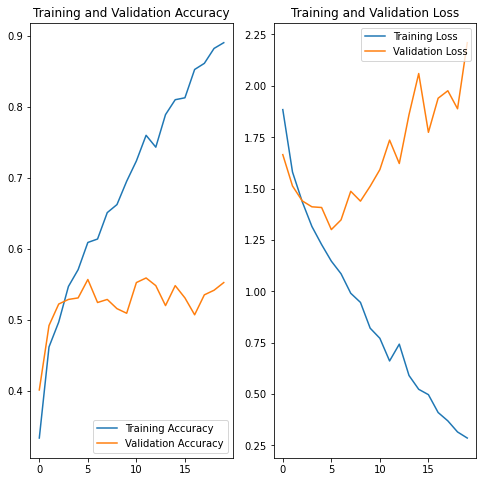

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**It is observed that the inital model is an overfitted model so building next model with data augmentation and dropout**

###Performing data augmentation

In [18]:
data_augmentation = keras.Sequential(
  [layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", input_shape=(img_height,img_width,3)),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

####Visualizing one instance of training image

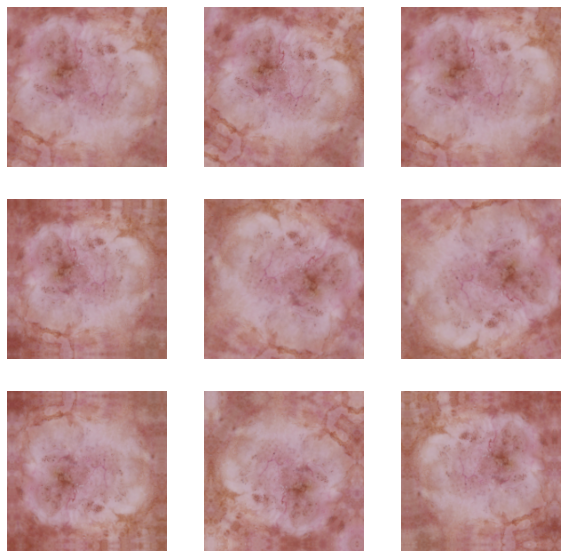

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

###Building the 2nd model

In [20]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu')))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

###Compiling the 2nd model

In [21]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
activation_5 (Activation)    (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_6 (Activation)    (None, 90, 90, 32)       

###Training the 2nd model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/20
58/58 [==============================] - 2s 26ms/step - loss: 2.2178 - accuracy: 0.2106 - val_loss: 1.9235 - val_accuracy: 0.2462
Epoch 2/20
58/58 [==============================] - 1s 23ms/step - loss: 1.8634 - accuracy: 0.3186 - val_loss: 1.6921 - val_accuracy: 0.4384
Epoch 3/20
58/58 [==============================] - 1s 23ms/step - loss: 1.6344 - accuracy: 0.3979 - val_loss: 1.6290 - val_accuracy: 0.4514
Epoch 4/20
58/58 [==============================] - 1s 23ms/step - loss: 1.5097 - accuracy: 0.4749 - val_loss: 1.4869 - val_accuracy: 0.4881
Epoch 5/20
58/58 [==============================] - 1s 23ms/step - loss: 1.4198 - accuracy: 0.4922 - val_loss: 1.4010 - val_accuracy: 0.5054
Epoch 6/20
58/58 [==============================] - 1s 23ms/step - loss: 1.3730 - accuracy: 0.5266 - val_loss: 1.5536 - val_accuracy: 0.4406
Epoch 7/20
58/58 [==============================] - 1s 23ms/step - loss: 1.3191 - accuracy: 0.5477 - val_loss: 1.6536 - val_accuracy: 0.4190
Epoch 8/20
58

###Visualizing the 2nd model

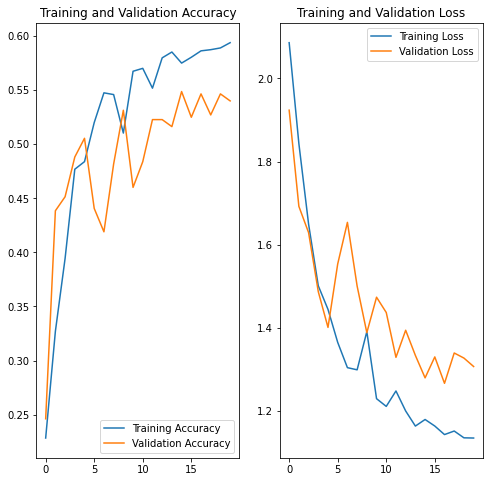

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**It is observed that the problem of overfitting has been reduced but the accuracy has dropped**

###Checking the distribution of classes

In [42]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [46]:
count_in_each_class = [114, 376, 95, 438, 357, 462, 77, 181, 139]
class_dist = pd.DataFrame({'class': class_names, 'count': count_in_each_class})
class_dist

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


####Imbalance in classes is observed

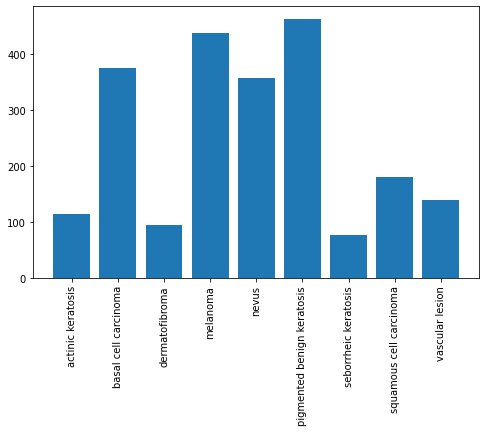

In [57]:
plt.figure(figsize=(8,5))
plt.bar(class_dist['class'], class_dist['count'])
plt.xticks(rotation=90)
plt.show()

**Findings:
  1) It is observed that seborrheic keratosis has the least no. of sample
  2) It is observed that pigmented benign keratosis has the highest number of samples.**

###Using Augmentor to handle class imbalance problem

In [61]:
!pip install Augmentor

In [62]:
path_to_training_dataset=pathlib.Path("/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + '/' + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F94DD334310>:   0%|          | 1/500 [00:00<01:02,  7.96 Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F94DD429650>: 100%|██████████| 500/500 [00:19<00:00, 25.45 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F94DD35CDD0>:   0%|          | 1/500 [00:00<00:50,  9.86 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F94DD419210>: 100%|██████████| 500/500 [00:19<00:00, 25.30 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F94E401D590>: 100%|██████████| 500/500 [00:20<00:00, 24.97 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F94DD2C9A50>: 100%|██████████| 500/500 [01:32<00:00,  5.40 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F952EE93050>: 100%|██████████| 500/500 [01:18<00:00,  6.39 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F94DD33E990>:   0%|          | 1/500 [00:00<00:53,  9.26 Samples/s]                  

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F94DD67B110>: 100%|██████████| 500/500 [00:19<00:00, 26.18 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F94A404F550>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F95402BD110>: 100%|██████████| 500/500 [00:19<00:00, 26.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F94DD366850>: 100%|██████████| 500/500 [00:19<00:00, 25.78 Samples/s]


In [63]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5000


###Checking the distribution of the augmented data

In [64]:
from glob2 import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0024475.jpg_b35ac24d-28dc-42e9-992c-3e45c18d4f0f.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0027856.jpg_fc6df330-53e0-4a71-aa5d-020ae0674ba0.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0024669.jpg_53a9c00d-39f5-4fc1-ad3c-966ef733fb5a.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032692.jpg_c85c938c-8cae-471d-812a-9880f60bce4a.jpg',
 '/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0024662.jpg_369f055c-6e91-4c6c-bf06-13850b29c

In [65]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [66]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [68]:
#Creating dataframe with the training data
original_df = pd.DataFrame(train_ds)

In [69]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [70]:
new_df['Label'].value_counts()

nevus                         1000
vascular lesion                500
basal cell carcinoma           500
actinic keratosis              500
pigmented benign keratosis     500
melanoma                       500
squamous cell carcinoma        500
dermatofibroma                 500
seborrheic keratosis           500
Name: Label, dtype: int64

###Training the model on the data created using augmentor

In [71]:
batch_size = 32
img_height = 180
img_width = 180

###Creating a new training dataset using the augmented data

In [73]:
data_dir_train="/content/gdrive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 5792 files for training.


###Creating a new validation dataset using the augmented data

In [74]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7239 files belonging to 9 classes.
Using 1447 files for validation.


###Creating the 3rd model

In [76]:
model = Sequential()
model.add(data_augmentation)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(16, (3, 3), padding='same',
                 input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

###Compiling the model

In [77]:
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
activation_10 (Activation)   (None, 180, 180, 16)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
activation_11 (Activation)   (None, 90, 90, 32)       

###Training the model

In [79]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/30
181/181 [==============================] - 45s 240ms/step - loss: 1.9063 - accuracy: 0.2828 - val_loss: 1.4719 - val_accuracy: 0.4478
Epoch 2/30
181/181 [==============================] - 44s 235ms/step - loss: 1.4592 - accuracy: 0.4537 - val_loss: 1.4747 - val_accuracy: 0.4381
Epoch 3/30
181/181 [==============================] - 44s 236ms/step - loss: 1.3963 - accuracy: 0.4550 - val_loss: 1.2993 - val_accuracy: 0.4907
Epoch 4/30
181/181 [==============================] - 43s 233ms/step - loss: 1.3011 - accuracy: 0.4921 - val_loss: 1.3410 - val_accuracy: 0.4838
Epoch 5/30
181/181 [==============================] - 43s 230ms/step - loss: 1.2843 - accuracy: 0.4991 - val_loss: 1.2181 - val_accuracy: 0.5404
Epoch 6/30
181/181 [==============================] - 43s 229ms/step - loss: 1.2419 - accuracy: 0.5144 - val_loss: 1.1414 - val_accuracy: 0.5777
Epoch 7/30
181/181 [==============================] - 43s 228ms/step - loss: 1.1822 - accuracy: 0.5465 - val_loss: 1.1722 - val_ac

###Visualizing the training results

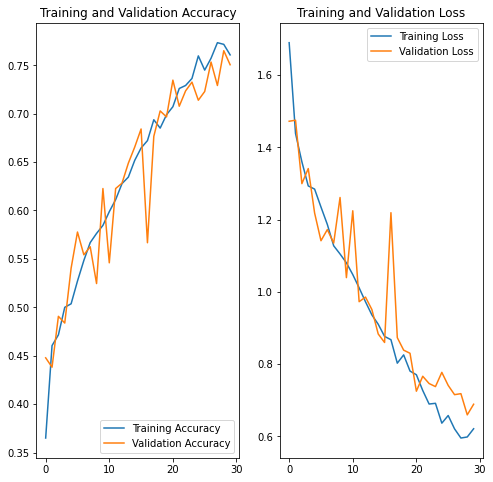

In [80]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Findings:

1.   The accuracy has improved in the final model.
2.   No such big deviation is observed in the training and validation accuracy, which indicates that we got rid of the overfitting problem. Handling Class imbalance problem has helped us in increasing the accuracy and solving the overfiiting problem.

